In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import mpl_toolkits.mplot3d
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

# ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ПОИСК АНОМАЛИЙ

Информация о датасете: Датасет был создан, чтобы выяснить, можно ли заменить дорогостояющую проверку сложных моделей процессов прогнозированием результатов аукциона.

Каждая строка датасета - один цикл проверки. Проверяем, возможна ли конкретная цена для конкретного товара, и может ли конкретный участник торгов выиграть товар по этой цене.

Фичи:

process.b1.capacity - Вместимость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 1.
process.b2.capacity - Емкость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 2.
process.b3.capacity - Емкость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 3.
process.b4.capacity - Вместимость (максимальное количество продуктов, которые нужно выиграть) Участника торгов 4.
property.price - Цена в данный момент подтверждена.
property.product - Продукт в настоящее время проверен.
property.winner - Участник торгов в настоящее время подтвержден как победитель продукта (0, если подтверждена только цена).
verification.result - Результат двоичной проверки - возможен ли проверенный результат?
verification.time - Время выполнения процедуры проверки.

In [2]:
data = pd.read_csv('data.csv')
data

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


# Подготовка данных

Размер датасета

In [3]:
data.shape

(2043, 9)

Статистическая информация

In [4]:
data.describe(include='all')

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043,2043.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781,NaN
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,NaN,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,NaN,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,NaN,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,NaN,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,NaN,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,NaN,10876.638889


Информация о наборе данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


Датасет содержит 9 столбцов, 2043 строки. Все столбцы, кроме verification.result, числовые, пропусков нет.

Таргет - verification.result. Посмторим его значение.

In [7]:
data['verification.result'].unique()

array([False,  True])

Проверим кол-во строк для каждого значения

In [9]:
data['verification.result'].value_counts()

,count
verification.result,
False,1781
True,262


Разобьем датасет на:

Y - целевая переменная, которую предсказываем (verification.result).

X - весь набор данных без целевой переменной.

In [10]:
X = data.drop(['verification.result'], axis=1)
y = data['verification.result']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (2043, 8) | y shape: (2043,) 


Стандартизация данных

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
colors = ['green', 'blue']
labels = [False, True]

# Метод главных компонентов (Principal Component Analysis, PCA)

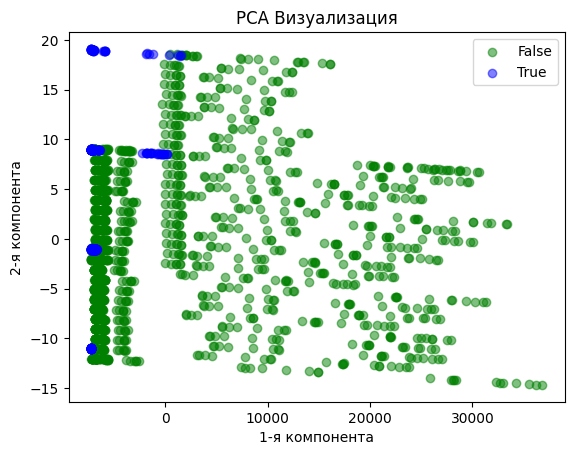

In [18]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


for i, label in enumerate([False, True]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('РСА Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

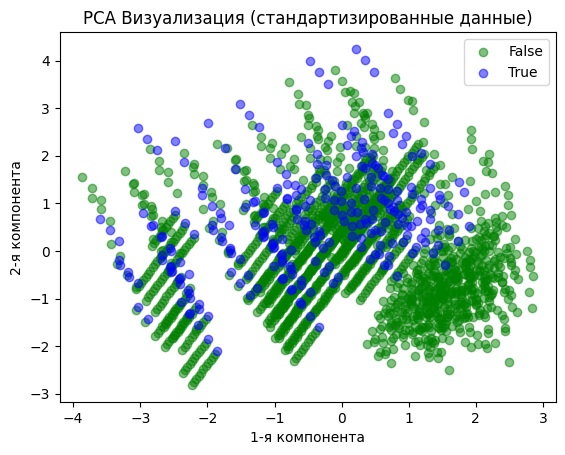

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


for i, label in enumerate([False, True]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('РСА Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# Независисый анализ компонентов (Independent Component Analysis, ICA)

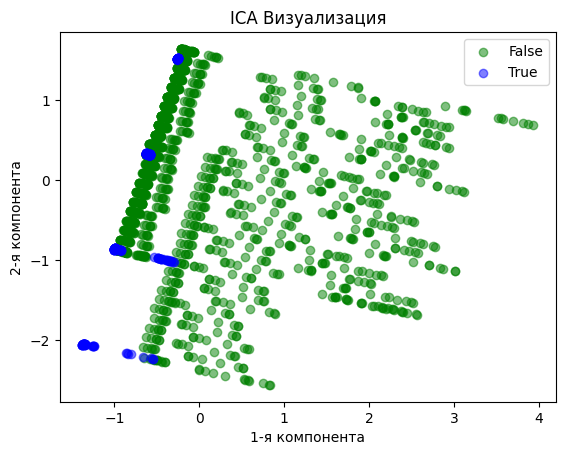

In [20]:
fast_ica = FastICA(n_components=2)
X_ica = fast_ica.fit_transform(X)


for i, label in enumerate([False, True]):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('IСА Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

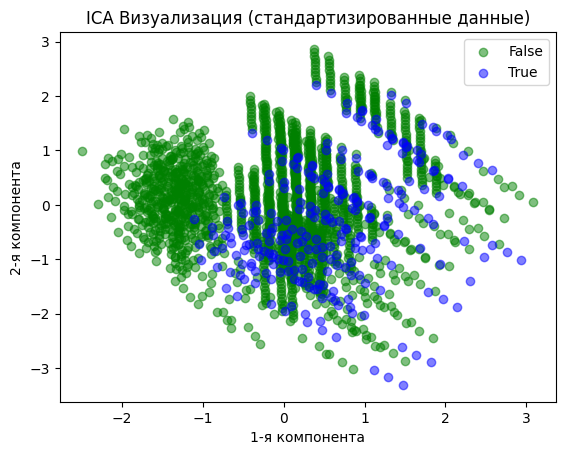

In [21]:
fast_ica = FastICA(n_components=2)
X_ica = fast_ica.fit_transform(X_scaled)


for i, label in enumerate([False, True]):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('IСА Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# Kernel PCA

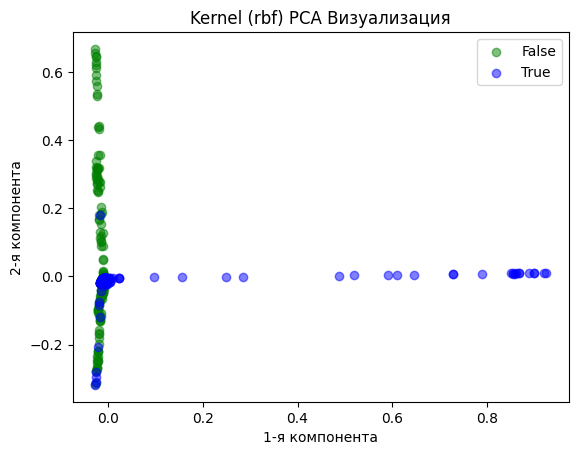

In [22]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_rbf = rbf_pca.fit_transform(X)


for i, label in enumerate([False, True]):
    plt.scatter(X_rbf[y == i, 0], X_rbf[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('Kernel (rbf) PCA Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

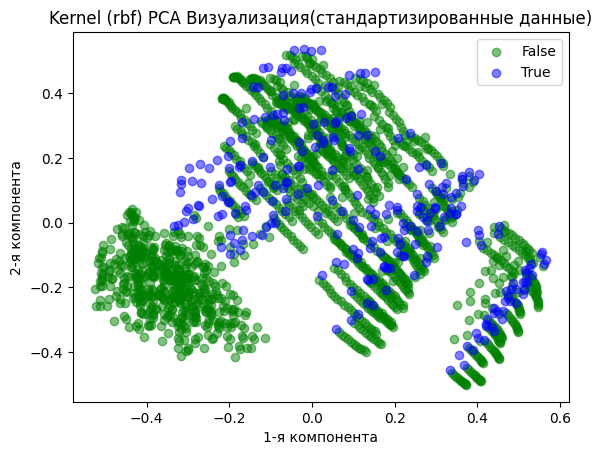

In [23]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_rbf = rbf_pca.fit_transform(X_scaled)


for i, label in enumerate([False, True]):
    plt.scatter(X_rbf[y == i, 0], X_rbf[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('Kernel (rbf) PCA Визуализация(стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# tSNE

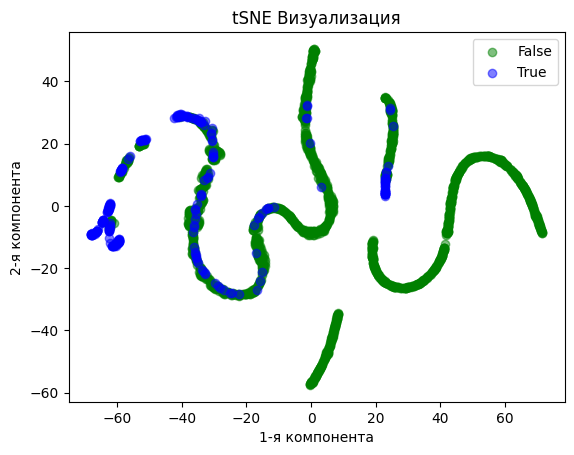

In [24]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


for i, label in enumerate([False, True]):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('tSNE Визуализация')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

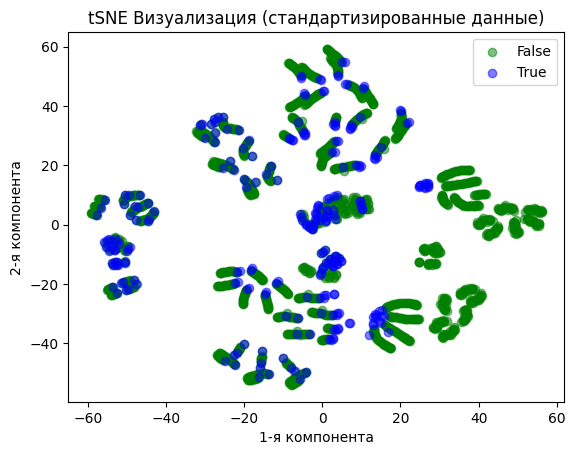

In [25]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)


for i, label in enumerate([False, True]):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=labels[i], alpha=0.5)

plt.title('tSNE Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

# DBSCAN для кластеризации

In [52]:
dbscan_cluster1 = DBSCAN(eps = 2.05, min_samples = 10)
X_new = dbscan_cluster1.fit(X_scaled)

In [54]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 0
v_measure = 0.006170484923034732


При eps = 2.05, min_samples = 10 удалось найти 2 кластера, 0 точек данных были отмечены как шум, а V-мера указывает на слабую кластеризации.



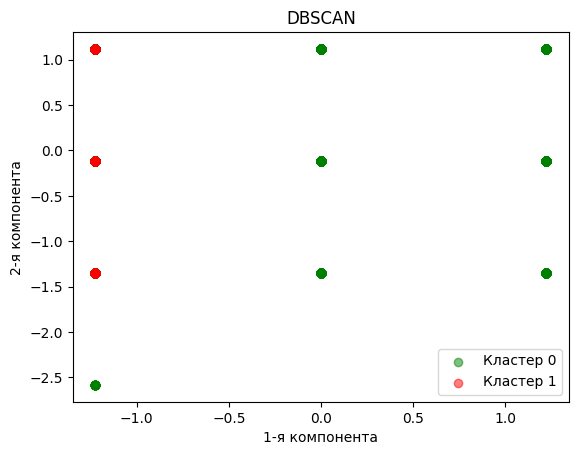

In [60]:
labels_dbsc = dbscan_cluster1.fit_predict(X_scaled)
unique_labels = set(labels_dbsc)
for i, label in enumerate(unique_labels):
    if label == -1:
        plt.scatter(X_scaled[labels_dbsc == label, 0], X_scaled[labels_dbsc == label, 1],
                    c='black', label=f'Шум', alpha=0.5)
    else:
        plt.scatter(X_scaled[labels_dbsc == label, 0], X_scaled[labels_dbsc == label, 1],
                    c=colors[i], label=f'Кластер {label}', alpha=0.5)

plt.title('DBSCAN')
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.legend()
plt.show()

# DBSCAN для определения выбросов

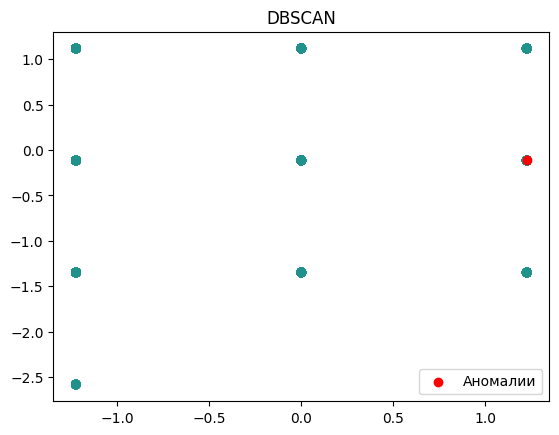

In [80]:
dbscan = DBSCAN(eps = 2.5, min_samples = 50)
pred = dbscan.fit_predict(X_scaled)
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
X_sc = pd.DataFrame(X_scaled)
values = X_sc.loc[anom_index]
cols = X_sc.columns[:2]
plt.scatter(X_sc[cols[0]], X_sc[cols[1]],c=dbscan.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r', label='Аномалии')
plt.title('DBSCAN')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()